In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


In [5]:
df= pd.read_csv(r"C:\Users\Pragna\Downloads\web-page-phishing.csv\web-page-phishing.csv")
df.shape

(100077, 20)

In [6]:
print(df.isnull().values.any()) #checks if the dataset contains any missing values(True or False)
print(df.isnull().sum()) #info on where and how many the missing value are there
df.head()

False
url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64


,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


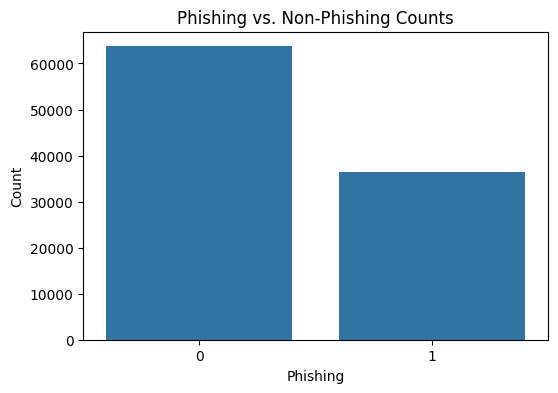

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='phishing', data=df)
plt.title('Phishing vs. Non-Phishing Counts')
plt.xlabel('Phishing')
plt.ylabel('Count')
plt.show()

In [8]:
X=df.drop(['phishing'],axis=1)
y=df['phishing']

In [9]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print(y_pred_lr)
print('accuracy',accuracy_score(y_test,y_pred_lr))
print('recall',recall_score(y_test,y_pred_lr))
print('f1',f1_score(y_test,y_pred_lr))
print('precision',precision_score(y_test,y_pred_lr))


[1 1 1 ... 1 1 1]
accuracy 0.8559818811617372
recall 0.7171040723981901
f1 0.7856434661907595
precision 0.8686691515018636


C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Assuming X_train, X_test, y_train, y_test are defined somewhere

knn = KNeighborsClassifier(n_neighbors=8,metric='manhattan')
knn.fit(X_train, y_train)
X1_test = np.array(X_test)
y_pred_knn = knn.predict(X1_test)

print('accuracy', accuracy_score(y_test, y_pred_knn))
print('recall', recall_score(y_test, y_pred_knn))
print('f1', f1_score(y_test, y_pred_knn))
print('precision', precision_score(y_test, y_pred_knn))


C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy 0.8838262723154809
recall 0.8048868778280543
f1 0.8360594096634707
precision 0.8697437903383533


In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(y_pred_dt)
print('accuracy',accuracy_score(y_test,y_pred_dt))
print('recall',recall_score(y_test,y_pred_dt))
print('f1',f1_score(y_test,y_pred_dt))
print('precision',precision_score(y_test,y_pred_dt))

[1 1 1 ... 1 1 1]
accuracy 0.8836597388755663
recall 0.8073303167420814
f1 0.8362784157487696
precision 0.8673796791443851


In [13]:
from sklearn import svm
sv=svm.SVC(kernel='linear',C=0.01)
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
from sklearn.metrics import classification_report
print('accuracy',accuracy_score(y_test,y_pred_sv))
print('recall',recall_score(y_test,y_pred_sv))
print('f1',f1_score(y_test,y_pred_sv))
print('precision',precision_score(y_test,y_pred_sv))

accuracy 0.8551159072741806
recall 0.718371040723982
f1 0.7849302877484426
precision 0.8650828247602441


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.01)
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)
from sklearn.metrics import classification_report
print('accuracy',accuracy_score(y_test,y_pred_gb))
print('recall',recall_score(y_test,y_pred_gb))
print('f1',f1_score(y_test,y_pred_gb))
print('precision',precision_score(y_test,y_pred_gb))



accuracy 0.8597122302158273
recall 0.7440723981900452
f1 0.7960883036405887
precision 0.8559233812200708


In [15]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(learning_rate=0.01)
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)
from sklearn.metrics import classification_report
print('accuracy',accuracy_score(y_test,y_pred_ad))
print('recall',recall_score(y_test,y_pred_ad))
print('f1',f1_score(y_test,y_pred_ad))
print('precision',precision_score(y_test,y_pred_ad))

accuracy 0.8324673594457768
recall 0.6579185520361991
f1 0.742973939703628
precision 0.8532863849765259


In [16]:
from xgboost import XGBClassifier
xg=XGBClassifier(learning_rate=1)
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
from sklearn.metrics import classification_report
print('accuracy',accuracy_score(y_test,y_pred_xg))
print('recall',recall_score(y_test,y_pred_xg))
print('f1',f1_score(y_test,y_pred_xg))
print('precision',precision_score(y_test,y_pred_xg))

accuracy 0.8914868105515588
recall 0.832579185520362
f1 0.849570597469757
precision 0.8672699849170438


In [17]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(learning_rate=1)
cat.fit(X_train,y_train)
y_pred_cat=cat.predict(X_test)
from sklearn.metrics import classification_report
print('accuracy',accuracy_score(y_test,y_pred_cat))
print('recall',recall_score(y_test,y_pred_cat))
print('f1',f1_score(y_test,y_pred_cat))
print('precision',precision_score(y_test,y_pred_cat))

0:	learn: 0.3200701	total: 152ms	remaining: 2m 31s
1:	learn: 0.2932996	total: 174ms	remaining: 1m 26s
2:	learn: 0.2829717	total: 190ms	remaining: 1m 3s
3:	learn: 0.2744369	total: 207ms	remaining: 51.5s
4:	learn: 0.2690144	total: 223ms	remaining: 44.4s
5:	learn: 0.2645617	total: 241ms	remaining: 39.8s
6:	learn: 0.2612684	total: 260ms	remaining: 36.9s
7:	learn: 0.2600197	total: 283ms	remaining: 35.1s
8:	learn: 0.2578351	total: 308ms	remaining: 34s
9:	learn: 0.2560390	total: 336ms	remaining: 33.2s
10:	learn: 0.2554566	total: 360ms	remaining: 32.3s
11:	learn: 0.2539915	total: 383ms	remaining: 31.5s
12:	learn: 0.2534576	total: 400ms	remaining: 30.4s
13:	learn: 0.2524199	total: 419ms	remaining: 29.5s
14:	learn: 0.2521041	total: 497ms	remaining: 32.7s
15:	learn: 0.2487483	total: 524ms	remaining: 32.3s
16:	learn: 0.2466409	total: 546ms	remaining: 31.6s
17:	learn: 0.2454586	total: 556ms	remaining: 30.4s
18:	learn: 0.2445838	total: 572ms	remaining: 29.5s
19:	learn: 0.2437845	total: 589ms	remaini

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

y_rf=rf.predict(X_test)
from sklearn.metrics import classification_report
print('accuracy',accuracy_score(y_test,y_rf))
print('recall',recall_score(y_test,y_rf))
print('f1',f1_score(y_test,y_rf))
print('precision',precision_score(y_test,y_rf))

accuracy 0.8917199573674394
recall 0.8337556561085973
f1 0.8500253725146468
precision 0.8669426931401149


C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


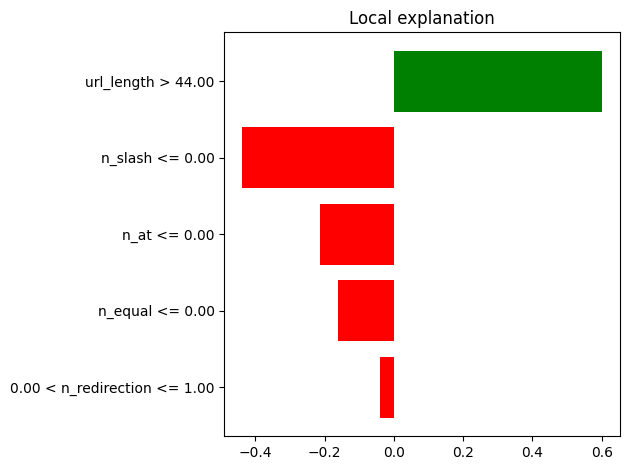

In [19]:
from lime.lime_tabular import LimeTabularExplainer

#X = pd.DataFrame(X)
#y=pd.DataFrame(y_test)
#print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X.columns.values.tolist(),class_names=['phishing'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X.values[1], rf.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()
exp.show_in_notebook(show_table=True)

In [20]:
fi=pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)


,Feature,Importance
0,url_length,0.443506
1,n_slash,0.305354
2,n_dots,0.062255
3,n_hypens,0.055412
4,n_equal,0.046982
5,n_redirection,0.030382
6,n_underline,0.021769
7,n_and,0.009141
8,n_questionmark,0.007682
9,n_percent,0.007245


In [26]:
from shapash.explainer.smart_explainer import SmartExplainer

# Assuming 'rf' is your trained RandomForest model and 'X_test' is your test dataset
xpl = SmartExplainer(rf)
xpl.compile(x=X_test)
xpl.plot.features_importance()


ImportError: cannot import name 'SmartExplainer' from partially initialized module 'shapash.explainer.smart_explainer' (most likely due to a circular import) (C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shapash\explainer\smart_explainer.py)

In [28]:
import random
subset = random.choices(X_test.index, k =50)
xpl.plot.features_importance(selection=subset)

In [29]:
xpl.plot.contribution_plot('url_length')

In [24]:
xpl.plot.local_plot(index=random.choice(X_test.index))

NameError: name 'xpl' is not defined

C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



,Feature,Importance
0,url_length,0.369726
1,n_slash,0.362107
2,n_hypens,0.063185
3,n_dots,0.058666
4,n_equal,0.047207
5,n_redirection,0.029749
6,n_underline,0.025352
7,n_and,0.014528
8,n_questionmark,0.009578
9,n_percent,0.007215


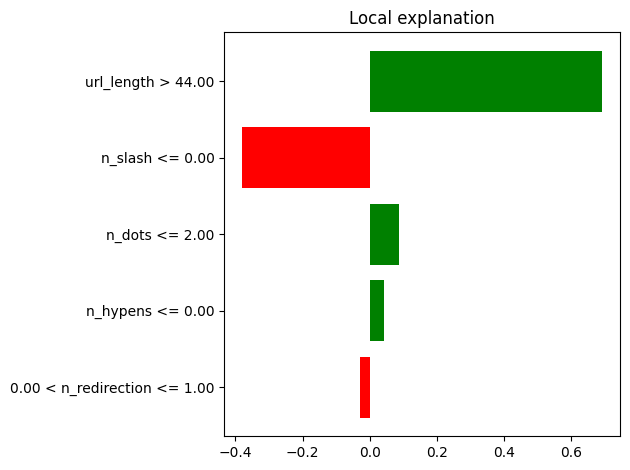

In [30]:
from lime.lime_tabular import LimeTabularExplainer

#X = pd.DataFrame(X)
#y=pd.DataFrame(y_test)
#print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X.columns.values.tolist(),class_names=['phishing'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X.values[1], knn.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()
exp.show_in_notebook(show_table=True)
fi=pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

In [3]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer(rf)
xpl.compile(x=X_test)
xpl.plot.features_importance()

ImportError: cannot import name 'SmartExplainer' from partially initialized module 'shapash.explainer.smart_explainer' (most likely due to a circular import) (C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shapash\explainer\smart_explainer.py)

In [ ]:
import random
subset = random.choices(X_test.index, k =50)
xpl.plot.features_importance(selection=subset)

In [ ]:
x1=np.array([y_pred_gb,y_pred_ad,y_pred_cat,y_pred_xg,y_rf]).T
meta_learner_bag=RandomForestClassifier(n_estimators=1000, max_depth=None,
                          min_samples_leaf=3,
                          max_features='log2',random_state=10)
meta_learner_bag.fit(x1,y_test)
y_pred_ens2=meta_learner_bag.predict(x1)
print('accuracy',accuracy_score(y_test,y_pred_ens2))
print('recall',recall_score(y_test,y_pred_ens2))
print('f1',f1_score(y_test,y_pred_ens2))
print('precision',precision_score(y_test,y_pred_ens2))

accuracy 0.8943511857180922
recall 0.8470588235294118
f1 0.855106888361045
precision 0.8633093525179856


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000, max_depth=None,
                          min_samples_leaf=3,
                          max_features='log2',random_state=10)
rf.fit(X_train,y_train)

y_rf=rf.predict(X_test)
from sklearn.metrics import classification_report
print('accuracy',accuracy_score(y_test,y_rf))
print('recall',recall_score(y_test,y_rf))
print('f1',f1_score(y_test,y_rf))
print('precision',precision_score(y_test,y_rf))

accuracy 0.8929189981348254
recall 0.8246153846153846
f1 0.8500396473716125
precision 0.8770815285398017


In [ ]:
x1=np.array([y_pred_lr,y_pred_dt,y_pred_knn,y_pred_sv]).T
meta_learner=KNeighborsClassifier()
meta_learner.fit(x1,y_test)
y_pred_ens2=meta_learner.predict(x1)
print('accuracy',accuracy_score(y_test,y_pred_ens2))
print('recall',recall_score(y_test,y_pred_ens2))
print('f1',f1_score(y_test,y_pred_ens2))
print('precision',precision_score(y_test,y_pred_ens2))


accuracy 0.8884225952571276
recall 0.8357466063348417
f1 0.8464711274060496
precision 0.8574744661095636


In [ ]:
x2=np.array([y_pred_knn,y_pred_dt,y_pred_xg,y_pred_cat]).T
meta_learner1=RandomForestClassifier()
meta_learner1.fit(x2,y_test)
y_pred_ens3=meta_learner1.predict(x2)
print('accuracy',accuracy_score(y_test,y_pred_ens3))
print('recall',recall_score(y_test,y_pred_ens3))
print('f1',f1_score(y_test,y_pred_ens3))
print('precision',precision_score(y_test,y_pred_ens3))

accuracy 0.8928190780708767
recall 0.8412669683257918
f1 0.8524530032095369
precision 0.8639405204460967


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=10,stop=2000,num=100)]
max_features=['auto','log2','sqrt']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[1,2,3,4,5,8,10,12,15]
min_samples_leaf=[1,2,4,6,8,9,11]
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':['entropy','gini']}
print(random_grid)
rf=RandomForestClassifier()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,n_jobs=-1,random_state=100,verbose=2)
rf_random.fit(X_train,y_train)
rf_random.best_params_
best_param_grid=rf_random.best_estimator_
from sklearn.metrics import accuracy_score
y_pred_random=best_param_grid.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred_random))
print('recall',recall_score(y_test,y_pred_random))
print('f1',f1_score(y_test,y_pred_random))
print('precision',precision_score(y_test,y_pred_random))

{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 211, 231, 251, 271, 291, 311, 331, 351, 371, 391, 412, 432, 452, 472, 492, 512, 532, 552, 572, 592, 613, 633, 653, 673, 693, 713, 733, 753, 773, 793, 814, 834, 854, 874, 894, 914, 934, 954, 974, 994, 1015, 1035, 1055, 1075, 1095, 1115, 1135, 1155, 1175, 1195, 1216, 1236, 1256, 1276, 1296, 1316, 1336, 1356, 1376, 1396, 1417, 1437, 1457, 1477, 1497, 1517, 1537, 1557, 1577, 1597, 1618, 1638, 1658, 1678, 1698, 1718, 1738, 1758, 1778, 1798, 1819, 1839, 1859, 1879, 1899, 1919, 1939, 1959, 1979, 2000], 'max_features': ['auto', 'log2', 'sqrt'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 8, 10, 12, 15], 'min_samples_leaf': [1, 2, 4, 6, 8, 9, 11], 'criterion': ['entropy', 'gini']}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
63 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

accuracy 0.8947175592859046
recall 0.8321266968325792
f1 0.8533246717089695
precision 0.8756308922959718


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':[rf_random.best_params_['criterion']],
            'max_depth':[rf_random.best_params_['max_depth']],
            'max_features':[rf_random.best_params_['max_features']],
             'min_samples_split':[rf_random.best_params_['min_samples_split'],
                                  rf_random.best_params_['min_samples_split']+2,
                                  rf_random.best_params_['min_samples_split']+4]
            ,'min_samples_leaf':[rf_random.best_params_['min_samples_leaf']-2,
                                 rf_random.best_params_['min_samples_leaf']-1,
                                 rf_random.best_params_['min_samples_leaf'],
                                 rf_random.best_params_['min_samples_leaf']+1,
                                 rf_random.best_params_['min_samples_leaf']+2],
            'n_estimators':[rf_random.best_params_['n_estimators']-200,
                            rf_random.best_params_['n_estimators'],
                            rf_random.best_params_['n_estimators']+100]}
print(param_grid)
rf1=RandomForestClassifier()
rf_random1=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
rf_random1.fit(X_train,y_train)
rf_random1.best_params_
best_param_gridd=rf_random1.best_estimator_
from sklearn.metrics import accuracy_score
y_pred_grid=best_param_gridd.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred_grid))
print('recall',recall_score(y_test,y_pred_grid))
print('f1',f1_score(y_test,y_pred_grid))
print('precision',precision_score(y_test,y_pred_grid))

{'criterion': ['gini'], 'max_depth': [890], 'max_features': ['sqrt'], 'min_samples_split': [3, 5, 7], 'min_samples_leaf': [0, 1, 2, 3, 4], 'n_estimators': [513, 713, 813]}
Fitting 10 folds for each of 45 candidates, totalling 450 fits


C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pragna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

accuracy 0.8939848121502798
recall 0.8427149321266968
f1 0.8540376943183381
precision 0.8656688667844195


In [ ]:
print("Shape of X.values[1]:", X.values[1].shape)
print("Shape of your training data:", X.values.shape)  # Assuming X is your entire dataset

print("Feature names used during training:", X.columns.values.tolist())

# Ensure that the features match between your training data and the data passed to explain_instance
print("Feature names passed to LimeTabularExplainer:", X.columns.values.tolist())

# Ensure that the model type and its input shape match the LimeTabularExplainer's expectations
print("Model type:", type(meta_learner1))

# Check the number of features expected by the model
print("Number of features expected by the model:", meta_learner1.n_features_in_)

# Verify the number of features expected by the explain_instance method
print("Number of features expected by explain_instance:", len(X.values[1]))


Shape of X.values[1]: (4,)
Shape of your training data: (30024, 4)
Feature names used during training: [0, 1, 2, 3]
Feature names passed to LimeTabularExplainer: [0, 1, 2, 3]
Model type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Number of features expected by the model: 2
Number of features expected by explain_instance: 4


       phishing
67531         1
89539         0
84639         1
149           0
7646          0
...         ...
74623         1
13863         0
95284         1
24008         1
62487         1

[30024 rows x 1 columns]


ValueError: X has 19 features, but RandomForestClassifier is expecting 5 features as input.